# Exploration Data Analysis notebook file

In [1]:
import os,sys
import pickle

In [2]:
from analysis.analysis_src.basic_data_Inspection import Data_Inspector,Data_Inspection_Strategies,ShowDataInspectionStrategy,SummaryStatisticsInspectionStrategy,InformationInspectionStrategy,DuplicateInspectionStrategy

In [3]:
pkl_data_path=os.path.join(os.path.dirname(os.getcwd()),"Data","processed","raw_data.pkl")

In [4]:
with open(pkl_data_path,"rb") as file:
    df=pickle.load(file)

In [5]:
#Initalize the Data_Inspector with strategy (ShowDataInspectionStrategy )
inspector=Data_Inspector(ShowDataInspectionStrategy())
#execute the strategy
inspector.execute_inspection(df)


Show dataframe
   id                             title  vote_average  vote_count    status  \
0   2                             Ariel         7.100       327.0  Released   
1   3               Shadows in Paradise         7.300       369.0  Released   
2   5                        Four Rooms         5.800      2613.0  Released   
3   6                    Judgment Night         6.483       329.0  Released   
4   8  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget    imdb_id  ...  \
0   1988-10-21         0.0     73.0         0.0  tt0094675  ...   
1   1986-10-17         0.0     74.0         0.0  tt0092149  ...   
2   1995-12-09   4257354.0     98.0   4000000.0  tt0113101  ...   
3   1993-10-15  12136938.0    109.0  21000000.0  tt0107286  ...   
4   2006-01-01         0.0     80.0     42000.0  tt0825671  ...   

       production_countries                        spoken_languages  \
0                   Finland        

In [6]:
inspector.set_strategy(SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(df)


Summary Statistics for Numerical Features
                 id   vote_average     vote_count       revenue  \
count  9.927150e+05  992713.000000  992713.000000  9.927130e+05   
mean   7.040750e+05       2.149999      23.636974  7.998805e+05   
std    3.896680e+05       3.098028     363.757928  1.846750e+07   
min    2.000000e+00       0.000000       0.000000 -1.200000e+01   
25%    3.772145e+05       0.000000       0.000000  0.000000e+00   
50%    6.992940e+05       0.000000       0.000000  0.000000e+00   
75%    1.047742e+06       5.000000       1.000000  0.000000e+00   
max    5.180730e+06      10.000000   36269.000000  3.000000e+09   

             runtime        budget     popularity    imdb_rating    imdb_votes  
count  992713.000000  9.927130e+05  992713.000000  422614.000000  4.226140e+05  
mean       45.677814  3.107069e+05       1.945942       6.259776  2.825244e+03  
std        58.285276  5.018650e+06       6.927964       1.316289  3.162069e+04  
min         0.000000  0.00000

In [7]:
inspector.set_strategy(InformationInspectionStrategy())
inspector.execute_inspection(df)


 Information of the dataframe is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992715 entries, 0 to 992714
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       992715 non-null  int64  
 1   title                    992706 non-null  object 
 2   vote_average             992713 non-null  float64
 3   vote_count               992713 non-null  float64
 4   status                   992713 non-null  object 
 5   release_date             883542 non-null  object 
 6   revenue                  992713 non-null  float64
 7   runtime                  992713 non-null  float64
 8   budget                   992713 non-null  float64
 9   imdb_id                  580293 non-null  object 
 10  original_language        992713 non-null  object 
 11  original_title           992705 non-null  object 
 12  overview                 817745 non-null  object 
 13  popularity              

# Explaination Data Analysis: Make a Story from Data

# Insights
1. **Data Types and Non-null Counts:**
    - The dataset contains 992715 entries and 27 columns.  
    - **Datatypes**: There are 1 column with 'int64' data type, 8 columns with 'float64' data type and 18 column with 'object' data type.  
        - **Numerical Features** : These include features like "id","vote_average","revenue","budget","popularity","etc"
        - **Categorical Features**: Features like "title","status","original_language","spoken_languages","director_of_photography"," etc". are categorical featues.

2. - **Summary Statistics**:
    - **Numerical Features** :
        - **"id"**: Range from 2 to 5.18 million, indicating a wide range of unique entries.
        - **vote_average**:
            - Mean : 2.14 ,which shows a low average rating
            - Min: 0, Max : 10.0 (expected range),but medium is 0, suggesting many items are unrated.
        - **vote_count**:
            - Mean : 23.636974, But the high standard deviation (363.76) indicates a skewness towards a few items receiving the most vote.
        - **revenue**:
            - Mean : $799,880 , with many entries at 0 revenue (median=0).This indicates many movies are unreleased or low-grossing movies.
            - The maximum revenue is a staggering 3.000000e+09 means $3 billion.
        - **runtime**:
            - Mean : 45.68 minutes, with a wide standard deviation 58.28 minutes.
            - The maximum runtime is 14400 minutes , likely an anomly.
        - **budget**:'
            - Mean : $310,706 , but like revenue feature most entires have 0 budget, indicating missing and lower-budgets data.
        - **popularity**:
            - Mean : 1.945 and standard devation is 6.927964 and the max is 2107.35. Many movies seem to have very low popularity.
        - **imdb_rating**:
            - Mean : 6.26, Median :6.4 -- suggests most movies hover around average ratings.
            - imdb_votes : Most movies have very low votes, with a medium  of just 60 votes but few outliers with millions of votes.
    - **Categorical Features**:
        - **title**:
            - Most frequency title is "Home"(148 times).

        - **status**:
            - Dominated by "Released"(976,249 entires),indicates that the majority movies have been realeased.

        - **release_date**:
            - Most frequency release data :january 1,2006.
            - There are 42,921 unique release data, indicates may be wrong or duplicate dates or may be most moives release date have same.

        - **original language**:
            - Top language :English (494,820 entires) , indicates this dataset is primarily focused on the english-language movies.
            - There are 175 unique lanuages.
        - **genres**:
            - The most frequent genre is "Documentary" (139,826 entries).
            - There are 14,112 unique genres, with a wide variety in movie types.
        - **production company**:
            - Most frequent company: BBC (2409 movies).
        - **production countries**:
            - The United States of America appears most often (142,197 movies), indicating the dataset's skew towards Hollywood.
        - **cast**:
            - The most frequent actor is Mel Blanc, known for voicing animated characters.
        - **director**:
            - The most frequent director is Dave Fleischer, with 541 movies.
        
        - **writers**:
            - William Shakespeare tops the list of writers (290 occurrences), reflecting a possible trend of adaptations.
        
        - **music_composer**:
            -Ilaiyaraaja is the most frequent composer.

        

In [8]:
from analysis.analysis_src.missing_value_analysis import Missing_Values,MissingValueAnalysisTemplate

In [9]:
#initialize the missing_values_analysis
miss_values=Missing_Values()


 Missing values Count by Columns
title                           9
vote_average                    2
vote_count                      2
status                          2
release_date               109173
revenue                         2
runtime                         2
budget                          2
imdb_id                    412422
original_language               2
original_title                 10
overview                   174970
popularity                      2
tagline                    846092
genres                     290472
production_companies       536404
production_countries       392267
spoken_languages           382875
cast                       330911
director                   180264
director_of_photography    755911
writers                    514303
producers                  679417
music_composer             895421
imdb_rating                570101
imdb_votes                 570101
dtype: int64

Visualize the missing valies in DataFrame.....


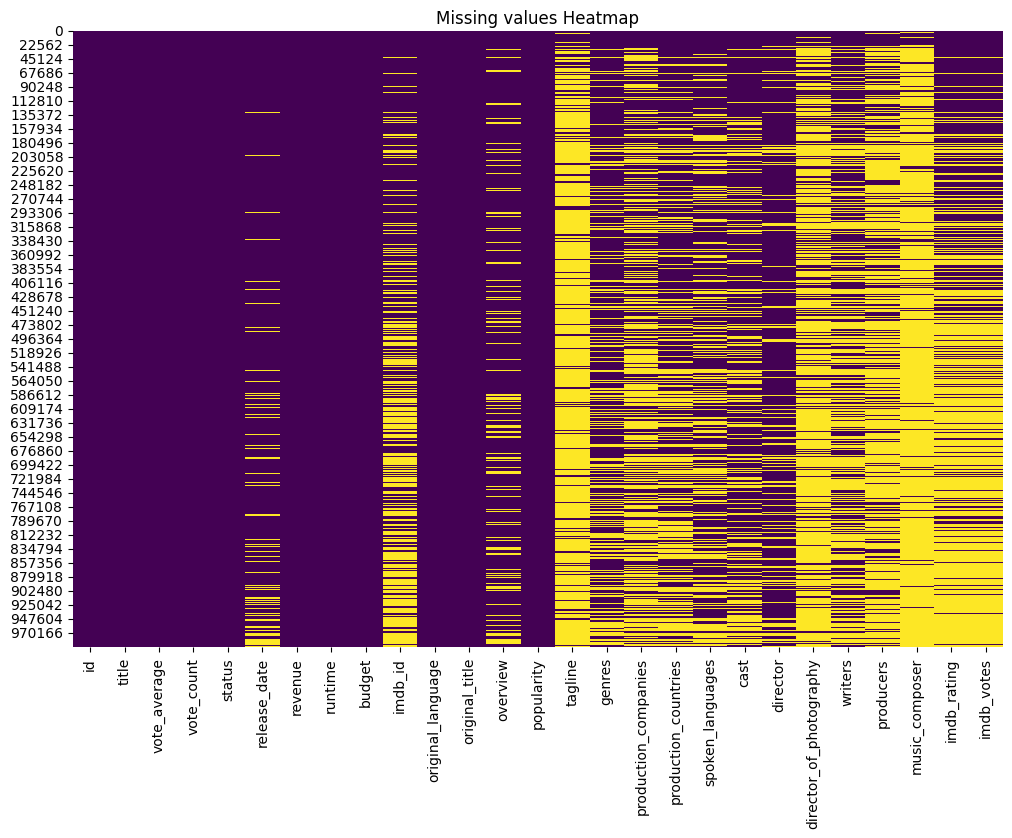

In [12]:
miss_values.analyze(df)

3**Missing Values Analysis**:
- Columns with Significant Missing Values:   
    - **tagline** has 846092 missing values(85.23 % missing),making it almost unusable without imputation or transformation.  
    